In [ ]:
'''Note: only the perceptron code is coded by self.'''

In [1]:
import numpy as np

In [14]:
class Perceptron:
    def __init__(self, learning_rate = 0.001, epochs = 50):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.param = {}
        self.errors = 0
    
    def forward(self, inputs):
        pred = np.sign(np.dot(inputs, self.param['w']) + self.param['b'])
        return pred
    
    def loss_updates(self, inputs, targets, preds):
        derivatives = {}
        if targets*preds <= 0:
            derivatives = {'w': targets*inputs, 'b': targets}
            self.errors += 1
        else:
            derivatives = {'w': np.zeros_like(self.param['w']), 'b': 0}
        return derivatives
    
    def update_parameters(self, derivatives):
        self.param['w'] += self.learning_rate*derivatives['w']
        self.param['b'] += self.learning_rate*derivatives['b']

    def train(self, inputs, targets):
        inputs = np.asarray(inputs)
        targets = np.asarray(targets)
        m, n = inputs.shape
        self.param = {'w': np.zeros(n), 'b': 0.0}

        for epoch in range(self.epochs):
            self.errors = 0
            for i in range(m):
                pred = self.forward(inputs[i])
                derivative = self.loss_updates(inputs[i], targets[i], pred)
                self.update_parameters(derivative)

            if epoch%5 == 0:
                print(f"Epoch: {epoch}, errors: {self.errors}")
            if self.errors == 0:
                print("Converged")
                break
    
    def predict(self, X):
        return self.forward(X)

In [15]:
# Simple dataset (AND gate)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([-1, -1, -1, +1])  # AND outputs: only last one is +1

# Train
p = Perceptron(learning_rate=0.1, epochs=10)
p.train(X, y)

# Test
print("Predictions:", p.predict(X))


Epoch: 0, errors: 2
Converged
Predictions: [-1. -1. -1.  1.]


In [16]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([-1, +1, +1, +1])

p = Perceptron(learning_rate=0.1, epochs=20)
p.train(X, y)

print("Predictions:", p.predict(X))


Epoch: 0, errors: 3
Epoch: 5, errors: 0
Converged
Predictions: [-1.  1.  1.  1.]


In [17]:
# Generate points
X = np.random.rand(20, 2) * 4  # 20 random points in [0,4]×[0,4]
# Define diagonal line y = 2x1 + x2 - 3 = 0
y = np.where(2*X[:,0] + X[:,1] - 3 >= 0, +1, -1)

p = Perceptron(learning_rate=0.01, epochs=50)
p.train(X, y)

print("Predictions:", p.predict(X))


Epoch: 0, errors: 3
Epoch: 5, errors: 2
Epoch: 10, errors: 0
Converged
Predictions: [ 1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]


In [18]:
print(y)

[ 1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


In [26]:
X = np.array([
    [1, 1],
    [1, 2],
    [1, 3],
    [3, 1],
    [3, 2],
    [3, 3]
])
y = np.array([-1, -1, -1, +1, +1, +1])  # separated by x1 = 2

p = Perceptron(learning_rate=0.1, epochs=20)
p.train(X, y)

print("Predictions:", p.predict(X))



Epoch: 0, errors: 2
Converged
Predictions: [-1. -1. -1.  1.  1.  1.]


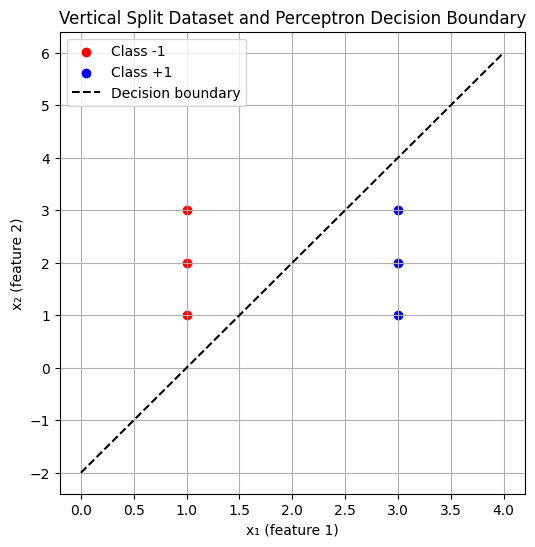

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of training points
plt.figure(figsize=(6,6))
plt.title("Vertical Split Dataset and Perceptron Decision Boundary")
plt.xlabel("x₁ (feature 1)")
plt.ylabel("x₂ (feature 2)")

# Plot data points by class
plt.scatter(X[y==-1][:,0], X[y==-1][:,1], color='red', label='Class -1')
plt.scatter(X[y==1][:,0],  X[y==1][:,1],  color='blue', label='Class +1')

# Create decision boundary line from w₁x₁ + w₂x₂ + b = 0
x1_vals = np.linspace(0, 4, 100)

# Avoid divide-by-zero if w₂ = 0
if p.param['w'][1] != 0:
    x2_vals = -(p.param['w'][0]*x1_vals + p.param['b']) / p.param['w'][1]
    plt.plot(x1_vals, x2_vals, 'k--', label='Decision boundary')
else:
    # If it's a vertical boundary, plot vertical line at -b/w1
    x_vertical = -p.param['b'] / p.param['w'][0]
    plt.axvline(x=x_vertical, color='k', linestyle='--', label='Decision boundary')

plt.legend()
plt.grid(True)
plt.show()


In [20]:
np.random.seed(42)
X = np.random.randn(30, 2)  # 30 points
true_w = np.array([1.5, -2.0])
true_b = 0.3

# Generate labels
y = np.sign(np.dot(X, true_w) + true_b)

p = Perceptron(learning_rate=0.05, epochs=30)
p.train(X, y)

preds = p.predict(X)
accuracy = np.mean(preds == y)
print(f"Training accuracy: {accuracy*100:.1f}%")


Epoch: 0, errors: 5
Converged
Training accuracy: 100.0%


In [21]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([-1, +1, +1, -1])  # XOR pattern

p = Perceptron(learning_rate=0.1, epochs=20)
p.train(X, y)

print("Predictions:", p.predict(X))


Epoch: 0, errors: 4
Epoch: 5, errors: 4
Epoch: 10, errors: 4
Epoch: 15, errors: 4
Predictions: [0. 0. 0. 0.]
